In [2]:
include("PVCR.jl");

## Change in residential tariff with new rules. No PV
### Consumer 275 kWh/month

In [3]:
PVRes.capacity = 0.0
residential.econsumption = 275; get_pmax(residential);
ebalance = annual_energy_balance(residential, PVRes, print_output=false);

In [8]:
ebalance[1]["utility_balance"]

Dict{String,Float64} with 6 entries:
  "consumer_energy_night"  => 101.166
  "consumer_energy_valley" => 93.7068
  "consumer_energy_peak"   => 77.2898
  "grid_energy_night"      => 101.166
  "grid_energy_peak"       => 77.2898
  "grid_energy_valley"     => 93.7068

In [9]:
bills_residential1 = Dict()
for m in 1:12
    bills_residential1[m] = monthly_bill(ebalance[m], residential, print_output=false)
end

In [10]:
bills_residential2 = Dict()
residential.tariff = A_R_CNFL
for m in 1:12
    bills_residential2[m] = monthly_bill(ebalance[m], residential; print_output=false, tax_cutoff = 0.0)
end

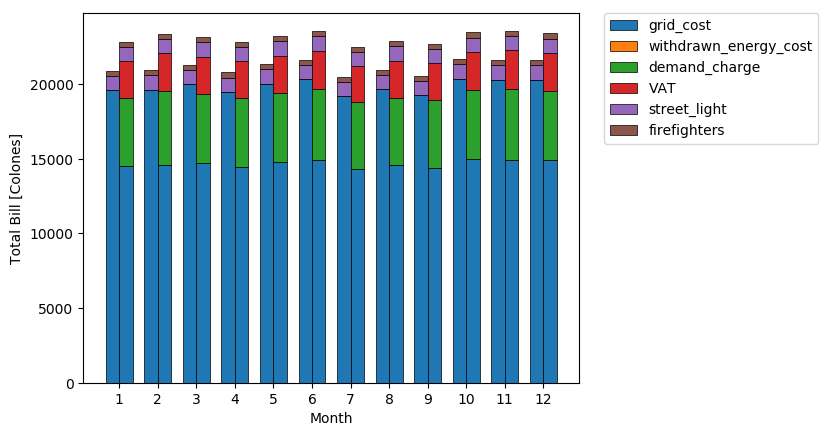

PyObject Text(24.0, 0.5, 'Total Bill [Colones]')

In [11]:
plot_bill(bills_residential1, bills_residential2, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"])

In [12]:
bills_residential1[1]["savings"]

Dict{String,Any} with 5 entries:
  "demand_charges"      => 0.0
  "street_light"        => -4.54747e-13
  "VAT"                 => 0.0
  "grid_energy_savings" => -7.27596e-12
  "firefighters"        => -1.13687e-13

## Change in residential tariff with new rules. PV System installed
### Consumer 275 kWh/month 1 kW PV System

In [13]:
PVRes.capacity = 1.0
residential.tariff = R_CNFL
ebalance = annual_energy_balance(residential, PVRes, print_output=false);

In [14]:
bills_residential1 = Dict()
for m in 1:12
    bills_residential1[m] = monthly_bill(ebalance[m], residential, print_output=false)
end

In [15]:
bills_residential2 = Dict()
residential.tariff = A_R_CNFL
for m in 1:12
    bills_residential2[m] = monthly_bill(ebalance[m], residential; print_output=false, tax_cutoff = 0.0)
end

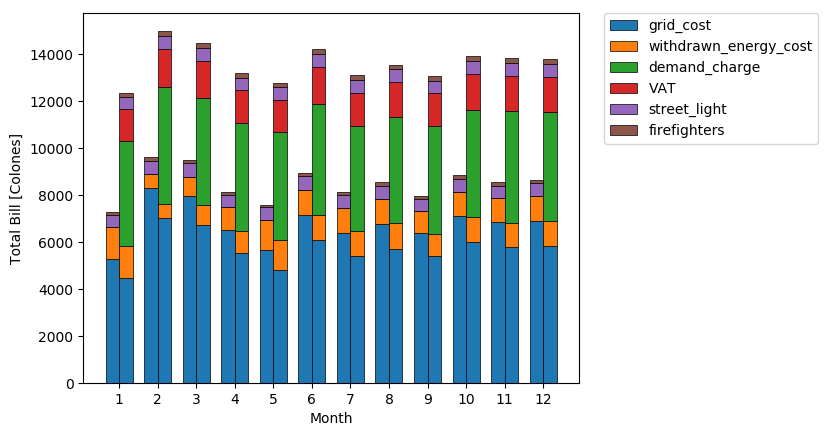

PyObject Text(24.0, 0.5, 'Total Bill [Colones]')

In [16]:
plot_bill(bills_residential1, bills_residential2, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"])

In [17]:
ebalance[1]["utility_balance"]

Dict{String,Float64} with 6 entries:
  "consumer_energy_night"  => 101.028
  "consumer_energy_valley" => 93.9928
  "consumer_energy_peak"   => 77.2382
  "grid_energy_night"      => 101.028
  "grid_energy_peak"       => 30.7429
  "grid_energy_valley"     => 16.4925